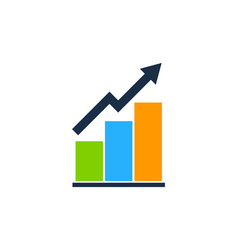


**About Stock Market Analysis:**
 
 - Stock market prediction is the process to determine the future value of company stock or other financial instruments traded on an exchange. The successful forecast of a stock’s future price could yield significant profit. My motivation in this project is that a good prediction helps us make better financial decisions (buy or sell) about the future. The main objective is to identify a high price for the next day to understand the movement of stocks in the market.I worked on a stock dataset from ***Investing.com*** 





**Steps involved are:**
 - Importing libraries
 - scraping datas
 - Model Building
 - Train the model 
 - Predict the model
 
 ### Library used

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import investpy
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
import warnings
warnings.filterwarnings('ignore')

### Scrap and Reading given dataset

**investpy**is a Python package to retrieve data from Investing.com, which provides data retrieval from up to 39952 stocks, 82221 funds, 11403 ETFs, 2029 currency crosses, 7797 indices, 688 bonds, 66 commodities, 250 certificates, and 4697 cryptocurrencies.
I used **Natural Gas** Data's for this prediction 

In [1]:
import investpy

df = investpy.get_stock_historical_data(stock='NG',       
                                        country='UNITED STATES',
                                        from_date='01/01/2010',
                                        to_date='01/06/2022')
print(df.head())

             Open   High    Low  Close  Volume Currency
Date                                                   
2010-01-04  5.685  5.784  5.595  5.703  455600      USD
2010-01-05  5.766  5.839  5.613  5.757  280100      USD
2010-01-06  5.766  6.046  5.730  5.938  295200      USD
2010-01-07  5.938  6.010  5.757  5.920  236300      USD
2010-01-08  5.956  6.046  5.830  6.001  222000      USD


 - Government defers these revenue and recognizes it over time. Until 2011, the period was eight years, then it was nine years. In FY 2019, the revenue recognition period was changed to ten years.

 - In the years large sums were coming in, the revenue deferrals served Liberal governments. Hiding revenue allowed them to freeze social benefits and justify program cuts.

 - Accountants might find it odd that revenue is spread over ten years on contracts that typically last three or five years. But, there is another factor at play. The Energy Ministry renews land deals administratively rather than re-tendering properties when contract period end.

 - This works in favour of companies already involved in the gas fields and works against new entrants to the industry. This process of administrative renewals also works against the public. Fewer and fewer land parcels are available in the monthly auctions. This chart illustrates:

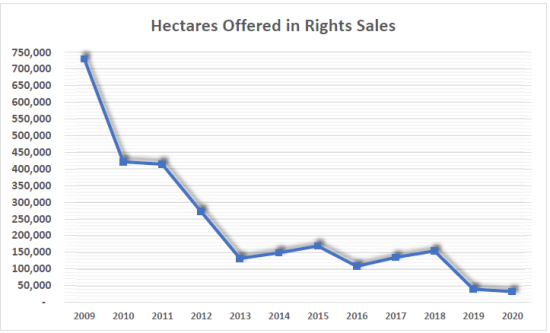

With the growth of royalty credit programs, that segment of natural gas revenue is disappearing as well. When looking at this chart, look back at the production figures.

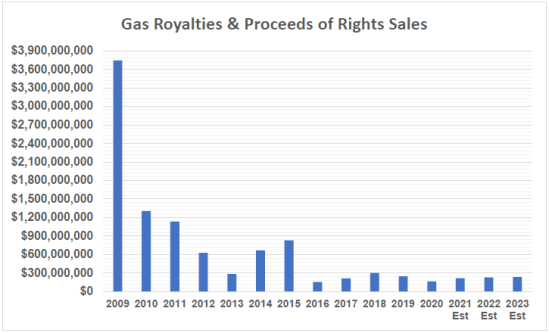

Like Liberals before them, the Horgan NDP has no intention of maximizing the public share of natural resources. 

They continue the royalty credits program without change and the total available to reduce producers’ future payments is now between $2.7 and  $3.0 billion.

## Basic Checks

In [3]:
df.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2010-01-04,5.685,5.784,5.595,5.703,455600,USD
2010-01-05,5.766,5.839,5.613,5.757,280100,USD
2010-01-06,5.766,6.046,5.730,5.938,295200,USD
2010-01-07,5.938,6.010,5.757,5.920,236300,USD
2010-01-08,5.956,6.046,5.830,6.001,222000,USD


In [4]:
print(df.tail())

            Open  High    Low  Close  Volume Currency
Date                                                 
2022-05-25  5.78  5.78  5.560   5.71  166267      USD
2022-05-26  5.67  5.84  5.670   5.72  144295      USD
2022-05-27  5.79  5.84  5.680   5.76  379050      USD
2022-05-31  5.82  5.88  5.515   5.59  219186      USD
2022-06-01  5.63  5.71  5.570   5.66  150886      USD


In [5]:
df.shape

(3124, 6)

In [6]:
df.size

18744

In [7]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3124.0,5.916586,2.616466,1.90,3.9200,5.1800,7.6500,15.25
High,3124.0,6.042227,2.665943,1.97,3.9875,5.3125,7.8025,15.25
Low,3124.0,5.785679,2.554219,1.90,3.8500,5.0500,7.4625,14.30
Close,3124.0,5.912754,2.611505,1.90,3.9200,5.1660,7.6505,14.61
Volume,3124.0,278740.730794,538382.273952,0.00,129202.5000,201417.5000,311676.2500,19669424.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3124 entries, 2010-01-04 to 2022-06-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      3124 non-null   float64
 1   High      3124 non-null   float64
 2   Low       3124 non-null   float64
 3   Close     3124 non-null   float64
 4   Volume    3124 non-null   int64  
 5   Currency  3124 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 170.8+ KB


### Checking for missing values

In [10]:
df.isnull().sum()

Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

**Remarks:**
 
There are no missing values

In [11]:
opn = df[['Open']]

<AxesSubplot:xlabel='Date'>

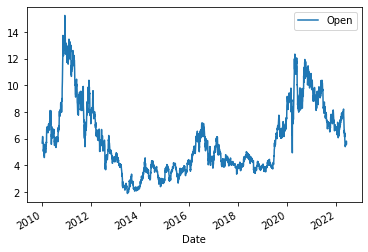

In [12]:
opn.plot()

In [13]:
ds = opn.values

In [14]:
ds

array([[5.685],
       [5.766],
       [5.766],
       ...,
       [5.79 ],
       [5.82 ],
       [5.63 ]])

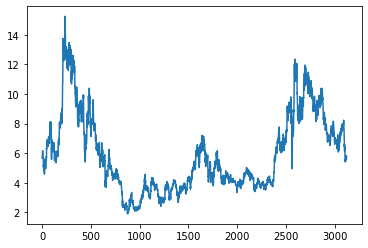

In [15]:
plt.plot(ds)

**I normalized stock prices by using min-max normalization for each stock. The goal of normalization is to change the values of price columns in a dataset to a common scale without distorting differences in the range of the values. This can be applied when features have different ranges (scales of inputs are wildly different).**

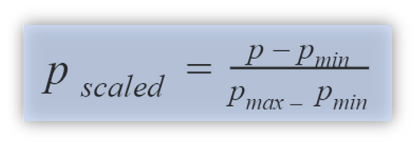

In [16]:
from sklearn.preprocessing import MinMaxScaler   #Scaling the target value is a good idea in regression modelling; scaling of the data makes it easy for a model to learn and understand the problem.

In [17]:
#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [18]:
len(ds_scaled), len(ds)

(3124, 3124)

In [19]:
print(ds_scaled)

[[0.2835206 ]
 [0.28958801]
 [0.28958801]
 ...
 [0.29138577]
 [0.29363296]
 [0.27940075]]


In [19]:
#Defining test and train data sizes
train_size = int(len(ds_scaled)*0.70)   #70% data
test_size = len(ds_scaled) - train_size  #30% data

In [20]:
train_size,test_size

(2186, 938)

In [21]:
#Splitting data between train and test
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]

In [22]:
len(ds_train),len(ds_test)

(2186, 938)

#### Introduction to  Long Short Term Memory

 - **LSTM**s were introduced by Hochreiter & Schmidhuber (1997), and they are explicitly designed to avoid the long-range issue that a vanilla RNN faces. They are slightly different than RNNs by using a different function to compute the hidden state. LSTM network consists of several memory blocks called cells. Two states are being passed to the next cell; the cell state and the hidden state. The LSTMs can add or remove information to the cell state via gates.

 - An **LSTM** cell has 5 vital components that allow it to utilize both long-term and short-term data: the cell state, hidden state, input gate, forget gate and output gate.

 
 - **Forget gate layer:** The decision of what information is going to pass from the cell state is done by the “forget gate layer.” It gives a number between 0 and 1 for each number in the cell state by using the sigmoid function. While 1 shows “let input through”, 0 means “do not let input through”.

 
 - **Input gate layer:** It manages the process of the addition of information to the cell state (decide which values to update). Firstly, it regulates what values need to be added to the cell state by using a sigmoid function. Then, it creates a vector including all possible values that can be added to the cell state by using the tanh function, which outputs values from -1 to +1. It multiplies the value of the filter (the sigmoid gate) to the created vector (the tanh function) and so it transfers this useful information to the cell state via addition operation.





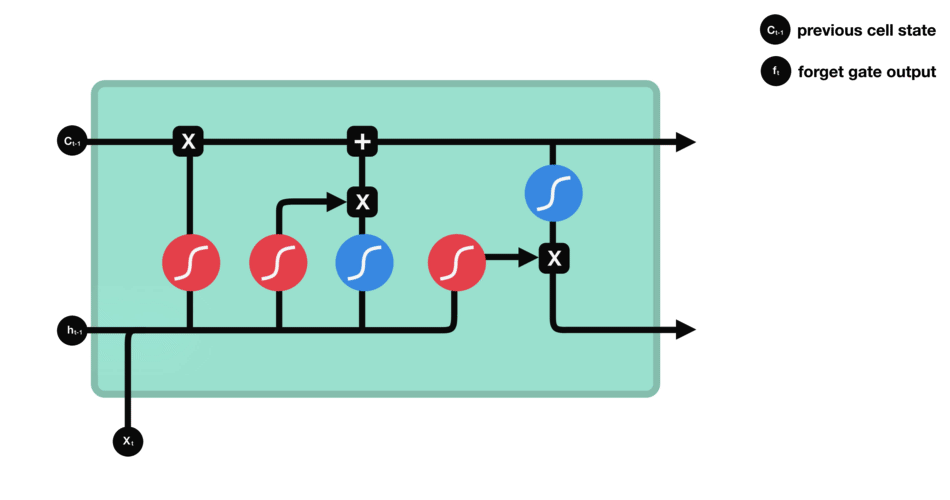

 - **Output gate layer:** In that step, the network selects useful information from the current cell state and shows as output is done via the output gate.

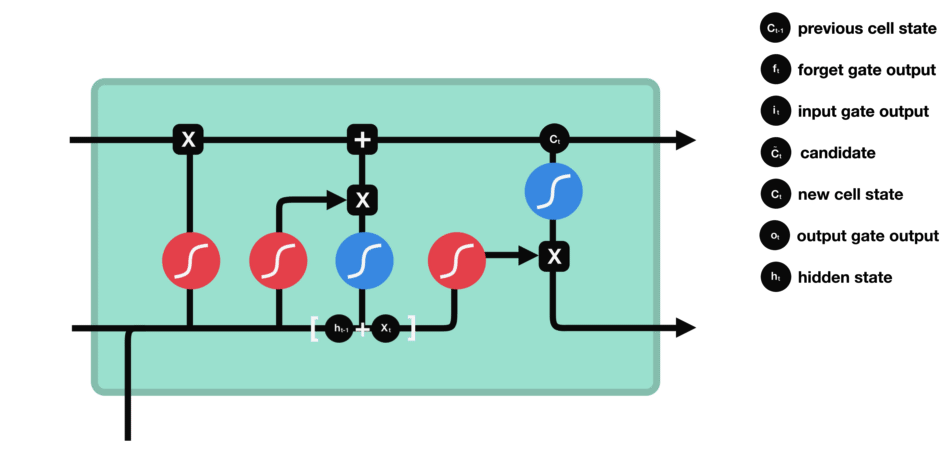

In [23]:
#creating dataset in time series for LSTM model 
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [24]:
#Taking 100 days price as one record for training
#reshape into X=t,t+1,t+2,t+3  and y = t+4
time_stamp = 100   #100 time stamp
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [25]:
X_train.shape,y_train.shape

((2085, 100), (2085,))

In [26]:
X_test.shape, y_test.shape

((837, 100), (837,))

In [27]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)   #100, 1
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

## Build the Model

 - We define the reconstruction LSTM Autoencoder architecture that expects input sequence with 3
 

In [29]:
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))   #input layers
model.add(LSTM(units=50,return_sequences=True))   #Hidden layers
model.add(LSTM(units=50))                         #Hidden layers
model.add(Dense(units=1,activation='linear'))     #out-put layers
model.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


## Training model with adam optimizer and mean squared error loss function

In [30]:
model.compile(loss='mean_squared_error',optimizer='adam')  #Adam is a combination of two gradient descent methods, Momentum, and RMSP
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
33/33 [==============================] - 7s 122ms/step - loss: 0.0175 - val_loss: 0.0049
Epoch 2/100
33/33 [==============================] - 3s 104ms/step - loss: 0.0021 - val_loss: 0.0029
Epoch 3/100
33/33 [==============================] - 4s 129ms/step - loss: 0.0018 - val_loss: 0.0027
Epoch 4/100
33/33 [==============================] - 3s 102ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 5/100
33/33 [==============================] - 3s 101ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 6/100
33/33 [==============================] - 3s 100ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 7/100
33/33 [==============================] - 3s 100ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 8/100
33/33 [==============================] - 4s 110ms/step - loss: 0.0014 - val_loss: 0.0028
Epoch 9/100
33/33 [==============================] - 3s 101ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 10/100
33/33 [==============================] - 4s 133ms/step - loss: 0.0012 - val_lo

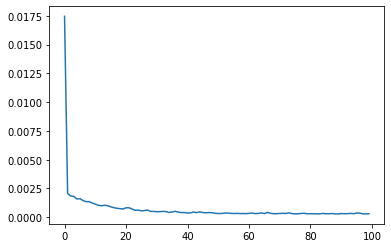

In [31]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

- That is, loss is a number indicating how bad the model's prediction was on a single example. 
- If the model's prediction is perfect, the loss is zero; otherwise, the loss is greater. 
- The goal of training a model is to find a set of weights and biases that have low loss, on average, across all examples.

In [122]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [123]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)
# the inverse transform method is to generate a random number from any probability distribution by using its inverse CDF

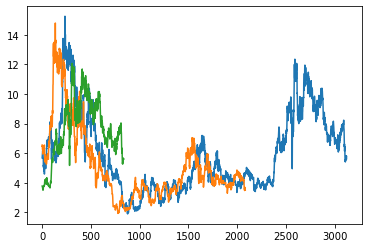

In [124]:
#Comparing using visuals
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [125]:
type(train_predict)

numpy.ndarray

In [126]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))  #MSE of Train Data

5.3660773295323025

In [127]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))   

7.43215022209674

In [128]:
test = np.vstack((train_predict,test_predict))

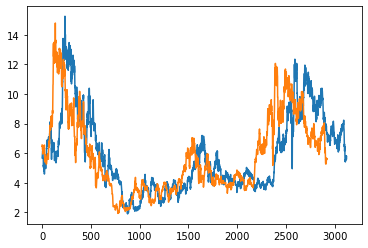

In [129]:
#Combining the predited data to create uniform data visualization
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [130]:
len(ds_test)

938

In [131]:
#Getting the last 100 days records
fut_inp = ds_test[838:]

In [132]:
fut_inp = fut_inp.reshape(1,-1)

In [133]:
tmp_inp = list(fut_inp)

In [134]:
fut_inp.shape

(1, 100)

In [135]:
#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

In [136]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.2730453610420227], [0.2625875473022461], [0.25278881192207336], [0.24312253296375275], [0.23345814645290375], [0.22394904494285583], [0.21475909650325775], [0.20599786937236786], [0.19772593677043915], [0.18996651470661163], [0.18271346390247345], [0.1759401112794876], [0.16960634291172028], [0.16366510093212128], [0.15806734561920166], [0.15276600420475006], [0.14771823585033417], [0.1428869366645813], [0.13824161887168884], [0.13375785946846008], [0.1294173002243042], [0.12520654499530792], [0.12111657857894897], [0.11714143306016922], [0.1132776215672493], [0.10952312499284744], [0.10587689280509949], [0.10233823210000992], [0.09890638291835785], [0.09558042883872986]]


In [137]:
len(ds_scaled)

3124

In [138]:
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

This green line is the predicted line


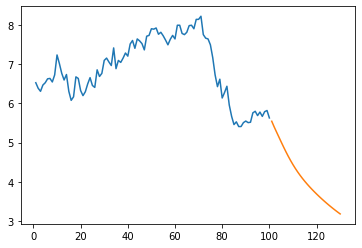

In [139]:
plt.plot(plot_new, normalizer.inverse_transform(ds_scaled[3024:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))
print("This green line is the predicted line")

In [114]:
ds_new = ds_scaled.tolist()

In [115]:
len(ds_new)

3124

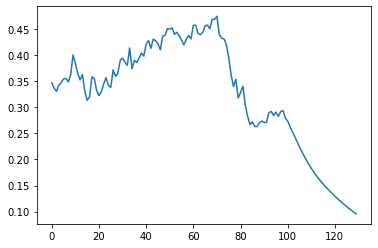

In [116]:
ds_new.extend(lst_output)
plt.plot(ds_new[3024:])

In [62]:

#Creating final data for plotting
final_graph = normalizer.inverse_transform(ds_new).tolist()

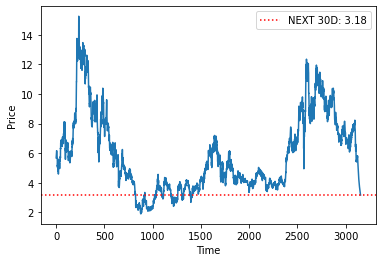

In [63]:
#Plotting final results with predicted value after 30 Days
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()

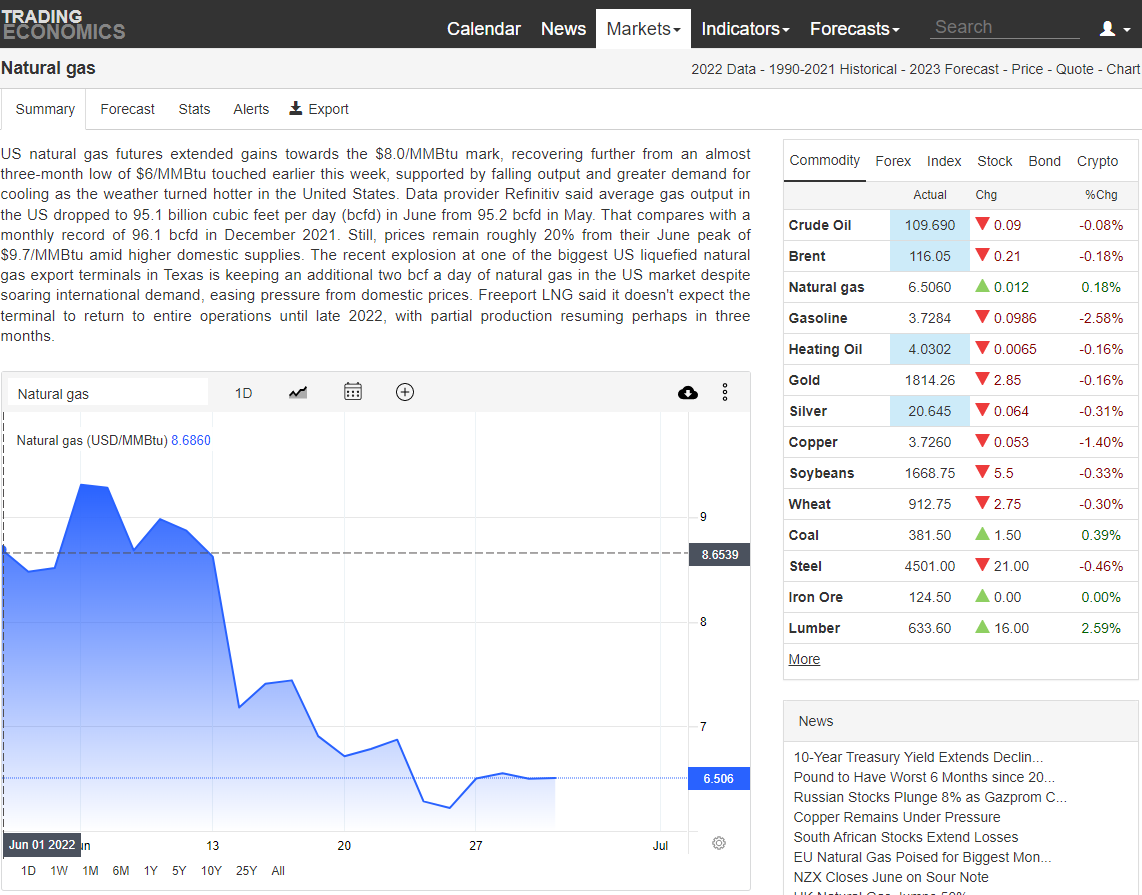

In this model i tried to show next 30Days predicton data from the date 01.06.2022 and comparing my predicted data with actual stock graph which graph i took from **Trading Economy**


Model create by : **Soumyadarshan Dah**